# Comparing autograd to non-autograd versions

(is autograd version faster?)

In [1]:
# Generic stuff
import os,sys,numpy as np,pandas as pd
from scipy.io import loadmat


# Vizualization stuff

# Choose which setting; for widget, need to use %matplotlib notebook
#%matplotlib notebook 
%matplotlib inline 
from matplotlib import pyplot as plt

# Spectral models stuff

sys.path.append('../../code/')
from robinson_autograd import Abeysuriya2015Model as Abeysuriya2015Model_ag
from robinson import Abeysuriya2015Model as Abeysuriya2015Model

In [2]:
mat = loadmat('../../scratch/100307_MEG_3-Restin_powavg.mat',struct_as_record=False,squeeze_me=True)['freq']

hcp_ps = pd.DataFrame(mat.powspctrm,columns=mat.freq,index=mat.label).T

data = hcp_ps.mean(axis=1).values
freqs = hcp_ps.index.values

data_mul = (hcp_ps.mean(axis=1).values*10**24).astype(float)

param_list = ['G_ee','G_ei','G_ese','G_esre','G_srs',
              'alpha','beta','t0','A_EMG']
       

/home/john/Software/miniconda3/envs/jupyter_py2/lib/python2.7/site-packages/matplotlib/axes/_base.py:3157: UserWarning: Attempted to set non-positive xlimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive xlimits for log-scale axis; '


      fun: 7.949228883810003e+45
 hess_inv: <9x9 LbfgsInvHessProduct with dtype=float64>
      jac: array([-1.09855869e+43, -8.44290794e+43,  5.78048674e+41,  9.50991480e+41,
       -8.95595149e+42,  2.02824096e+39,  0.00000000e+00,  1.46033349e+41,
        1.58880349e+51])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 180
      nit: 2
   status: 0
  success: True
        x: array([2.00000000e+01, 0.00000000e+00, 1.99021566e+02, 9.84917806e+01,
       2.00000000e+01, 1.00000000e+01, 5.00000000e+01, 5.00000000e+01,
       1.00000000e-05])
CPU times: user 1min 4s, sys: 469 ms, total: 1min 4s
Wall time: 1min 5s


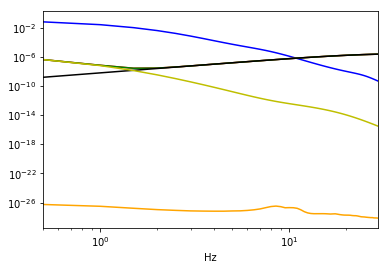

In [3]:
%%time

newparams = dict(G_ee=7.,G_ei=-27.,G_ese=78.,G_esre=-22.,G_srs=-1.,
                alpha=25.,beta=600.)#200.,beta=900,t=84.)
fit_mod = Abeysuriya2015Model()#freqs=freqs)
for k,v in newparams.items(): setattr(fit_mod,k,v)    
fit_mod.freqs = freqs[:60]
fit_mod.data = data[:60]
    
fig, ax = plt.subplots()#ncols=2, figsize=(12,3))
fit_mod.compute_P(fit_mod.freqs,return_df=True,normalize=False)['P_EEG_EMG'].loc[:60].plot(logx=True,logy=True,ax=ax,c='b')

fit_res,fit_df = fit_mod.fit(data[:60],freqs[:60],param_list,0.1,normalize=False)# alse)#True)

print(fit_res)

fit_mod.compute_P(fit_mod.freqs,return_df=True,normalize=False)['P_EEG_EMG'].loc[:60].plot(logx=True,logy=True,ax=ax,c='r')

#fit_df.loc[:60].data.plot(ax=ax,logy=True,logx=True)
fit_df['P_EEG_EMG'].loc[:60].plot(logx=True,logy=True,ax=ax,c='g')
fit_df['data'].loc[:60].plot(logx=True,logy=True,ax=ax,c='orange')
fit_df['P_EMG'].loc[:60].plot(logx=True,logy=True,ax=ax,c='k')
fit_df['P_EEG'].loc[:60].plot(logx=True,logy=True,ax=ax,c='y')


      fun: 7.94922873167111e+45
 hess_inv: <9x9 LbfgsInvHessProduct with dtype=float64>
      jac: array([-1.09853057e+43, -8.44276359e+43,  5.78096536e+41,  9.51028583e+41,
       -8.95575998e+42,  2.03453716e+39,  6.08269335e+37,  1.46018606e+41,
        1.58800948e+51])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 18
      nit: 2
   status: 0
  success: True
        x: array([2.00000000e+01, 0.00000000e+00, 1.99021403e+02, 9.84917196e+01,
       2.00000000e+01, 1.00000000e+01, 5.00000000e+01, 5.00000000e+01,
       1.00000000e-05])
CPU times: user 2min 1s, sys: 7.88 s, total: 2min 9s
Wall time: 2min 14s


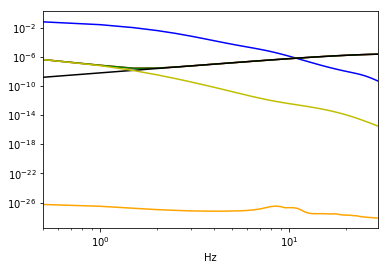

In [4]:
%%time

newparams = dict(G_ee=7.,G_ei=-27.,G_ese=78.,G_esre=-22.,G_srs=-1.,
                alpha=25.,beta=600.)#200.,beta=900,t=84.)
fit_mod = Abeysuriya2015Model_ag()#freqs=freqs)
for k,v in newparams.items(): setattr(fit_mod,k,v)    
fit_mod.freqs = freqs[:60]
fit_mod.data = data[:60]
    
fig, ax = plt.subplots()#ncols=2, figsize=(12,3))
fit_mod.compute_P(fit_mod.freqs,return_df=True,normalize=False)['P_EEG_EMG'].loc[:60].plot(logx=True,logy=True,ax=ax,c='b')

fit_res,fit_df = fit_mod.fit(data[:60],freqs[:60],param_list,0.1,normalize=False)# alse)#True)

print(fit_res)

fit_mod.compute_P(fit_mod.freqs,return_df=True,normalize=False)['P_EEG_EMG'].loc[:60].plot(logx=True,logy=True,ax=ax,c='r')

#fit_df.loc[:60].data.plot(ax=ax,logy=True,logx=True)
fit_df['P_EEG_EMG'].loc[:60].plot(logx=True,logy=True,ax=ax,c='g')
fit_df['data'].loc[:60].plot(logx=True,logy=True,ax=ax,c='orange')
fit_df['P_EMG'].loc[:60].plot(logx=True,logy=True,ax=ax,c='k')
fit_df['P_EEG'].loc[:60].plot(logx=True,logy=True,ax=ax,c='y')


Autograd one takes longer (??)